# Data Science Project On COVID 19 

# Business  Case


## Overview

The COVID-19 pandemic has had a profound impact on global health systems, economies, and daily life. Governments worldwide have struggled to manage the outbreak, allocate resources, and prepare for future waves. With the large volume of data being collected over time, data science offers powerful tools to analyze trends, forecast future cases, and support decision-making.


##  Problem Statement

In this project, we are tasked with analyzing COVID-19 case data to:
1. Perform a comprehensive exploratory data analysis (EDA) to understand the structure, trends, and key insights from the dataset.
2. Build a time series forecasting model to predict the number of confirmed cases and deaths over a fixed future period for a selected country or region.
3. Provide actionable insights and recommendations to the health department of that country or region, based on the forecasted trends.


##  Goals & Deliverables

- Clean and preprocess COVID-19 data collected from global sources (e.g., Johns Hopkins University).
- Identify trends and patterns in cases, deaths, and recovery rates across time and regions.
- Select an appropriate modeling approach (e.g., SARIMAX, LSTM, or regression-based models) to predict the future case trajectory.
- Evaluate model performance and validate prediction accuracy.
- Develop a set of practical recommendations that can help government and public health authorities plan for healthcare resource allocation, lockdown strategies, and vaccination rollouts.

##  Business Impact

Accurate forecasting of COVID-19 cases can:
- Help health authorities anticipate hospital bed and ICU requirements.
- Support timely lockdown or restriction decisions to minimize spread.
- Guide the allocation of medical resources (e.g., oxygen, ventilators, vaccines).
- Inform the public and reduce uncertainty with data-backed insights.


This project falls within the **healthcare analytics** and **epidemiological forecasting** domain, leveraging machine learning and time series modeling to solve real-world public health problems.

> By combining statistical analysis with predictive modeling, this data science project aims to empower health authorities with insights that can save lives and manage resources effectively.


# Domain Analysis

- **Date**: Represents the date when the data was recorded. Useful for time series analysis and trend detection.
- **Country/Region**: The name of the country or region for which the COVID-19 data is reported.
- **ConfirmedCases**: Total number of confirmed COVID-19 cases up to that date.
- **Deaths**: Total number of confirmed deaths due to COVID-19 up to that date.
- **Recovered**: Total number of patients who have recovered from COVID-19.

- **Province/State**: This column indicates the sub-national region (such as a province, state, or territory) within a country. It's especially relevant for large countries like the United States, Canada, India, or Australia, where the spread and response to COVID-19 can vary significantly between regions.

  For example:
  - In the US: California, New York, Texas, etc.
  - In India: Maharashtra, Kerala, Delhi, etc.
  - In Canada: Ontario, Quebec, Alberta, etc.

  This column allows for more localized analysis and comparison of COVID-19 metrics, enabling regional modeling, policy impact studies, and targeted forecasting.


## Library Imports

In this section, we import all the necessary libraries for data processing, visualization, machine learning, and deep learning. These include:
- `pandas`, `numpy` for data manipulation.
- `seaborn`, `matplotlib.pyplot` for data visualization.
- `sklearn`, `xgboost` for machine learning.
- `tensorflow.keras` for deep learning (LSTM).
- `statsmodels` for time series forecasting with SARIMAX.
- `imblearn` for handling imbalanced datasets.


In [33]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

from statsmodels.tsa.statespace.sarimax import SARIMAX
from imblearn.over_sampling import BorderlineSMOTE

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

warnings.filterwarnings("ignore")

##  Loading the Dataset

In [ ]:
## Loading dataset and Basic Checks

Loading the three key datasets from the Johns Hopkins repository:

- `confirmed_global.csv` – Contains the cumulative number of confirmed COVID-19 cases worldwide.
- `recovered_global.csv` – Contains the cumulative number of recovered cases.
- `deaths_global.csv` – Contains the cumulative number of deaths attributed to COVID-19.


These datasets provide the foundational metrics—confirmed, recovered, and deaths—that are critical for time series modeling, trend analysis, and forecasting.



In [ ]:
data = pd.read_csv('confirmed_global.csv')
data.head()

In [ ]:
data = pd.read_csv('recovered_global.csv')
data.head()

In [ ]:
data = pd.read_csv('deaths_global.csv')
data.head()

To avoid dealing with multiple wide-format datasets (each with hundreds of date columns), we merge the three key datasets — confirmed, recovered, and deaths — into a single dataframe.

This consolidation allows for:
- Easier handling and reshaping of the data (e.g., transforming into long format for time series).
- Synchronized date alignment across all metrics.
- Simplified analysis, visualization, and model training.

By merging on common columns such as `Province/State`, `Country/Region`, `Lat`, and `Long`, we ensure that each location's confirmed, recovered, and death counts are available in a single unified structure.

In [22]:
df = pd.read_csv("merged_covid19_data1.csv")
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/2020,0,0,0
1,NaN,Albania,41.15330,20.168300,1/22/2020,0,0,0
2,NaN,Algeria,28.03390,1.659600,1/22/2020,0,0,0
3,NaN,Andorra,42.50630,1.521800,1/22/2020,0,0,0
4,NaN,Angola,-11.20270,17.873900,1/22/2020,0,0,0


In [4]:
df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
60263,NaN,West Bank and Gaza,31.952200,35.233200,9/21/2020,36151,265,24428
60264,NaN,Western Sahara,24.215500,-12.885800,9/21/2020,10,1,8
60265,NaN,Yemen,15.552727,48.516388,9/21/2020,2028,586,1235
60266,NaN,Zambia,-13.133897,27.849332,9/21/2020,14175,331,13629
60267,NaN,Zimbabwe,-19.015438,29.154857,9/21/2020,7683,225,5924


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60268 entries, 0 to 60267
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  15860 non-null  object 
 1   Country/Region  60268 non-null  object 
 2   Lat             60268 non-null  float64
 3   Long            60268 non-null  float64
 4   Date            60268 non-null  object 
 5   Confirmed       60268 non-null  int64  
 6   Deaths          60268 non-null  int64  
 7   Recovered       60268 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 3.7+ MB


In [ ]:
# Check for missing values
df.isnull().sum()

Province/State    44408
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

In [6]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [10]:
# descriptive statistics
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered
count,60268.000000,60268.000000,6.026800e+04,60268.000000,6.026800e+04
mean,19.769714,27.371793,3.566174e+04,1456.479774,2.073073e+04
std,24.391309,66.752831,2.660675e+05,9328.995995,1.538861e+05
min,-51.796300,-102.552800,0.000000e+00,0.000000,0.000000e+00
25%,6.428055,-9.429499,1.300000e+01,0.000000,1.000000e+00
50%,21.512583,21.824300,3.630000e+02,5.000000,1.550000e+02
75%,39.399900,84.250000,3.692000e+03,73.000000,1.602000e+03
max,71.706900,178.065000,6.856884e+06,199865.000000,4.396399e+06


In [9]:
#descriptive statistics only for the columns with object
df.describe(include = 'O')

,Province/State,Country/Region,Date
count,15860,60268,60268
unique,65,184,244
top,Australian Capital Territory,China,1/22/2020
freq,244,7564,247


In [23]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# EDA

##  Exploratory Data Analysis (EDA)

In this section, we perform visual and statistical exploration to understand the distribution, trends, and relationships in the data. Key steps include:
- Visualizing the trend of confirmed cases and deaths over time.
- Analyzing the distribution of variables such as population, testing rate, and stringency index.
- Comparing case counts between countries or provinces using bar plots.
- Understanding correlation between features using a heatmap.

These steps help us uncover patterns and potential predictors for the forecasting model.

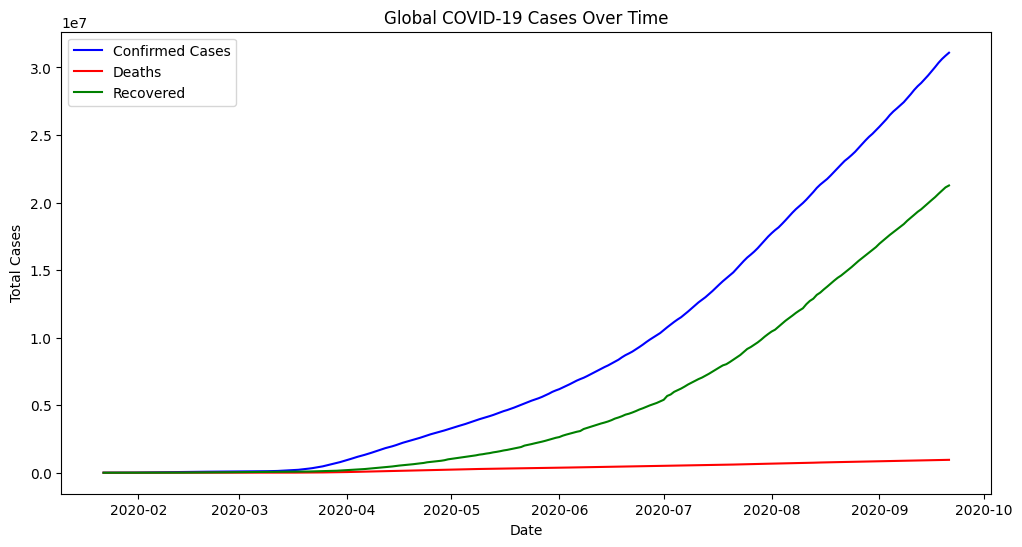

In [12]:
# Aggregate data at global level
global_cases = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Plot global trends
plt.figure(figsize=(12,6))
plt.plot(global_cases['Confirmed'], label='Confirmed Cases', color='blue')
plt.plot(global_cases['Deaths'], label='Deaths', color='red')
plt.plot(global_cases['Recovered'], label='Recovered', color='green')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Global COVID-19 Cases Over Time')
plt.legend()
plt.show()

###  Time Series Plots

- **Confirmed Cases Over Time**: This line plot shows the cumulative increase in confirmed COVID-19 cases over time. It helps visualize the growth rate and the points where rapid spread occurred.
- **Deaths Over Time**: Similar to the above, but for fatalities. It shows the lag effect from confirmed cases to deaths.
- **Recovered Cases Over Time**: This plot displays the growth in recovered cases over time. It provides insight into recovery rates, healthcare effectiveness, and overall progress in controlling the pandemic.


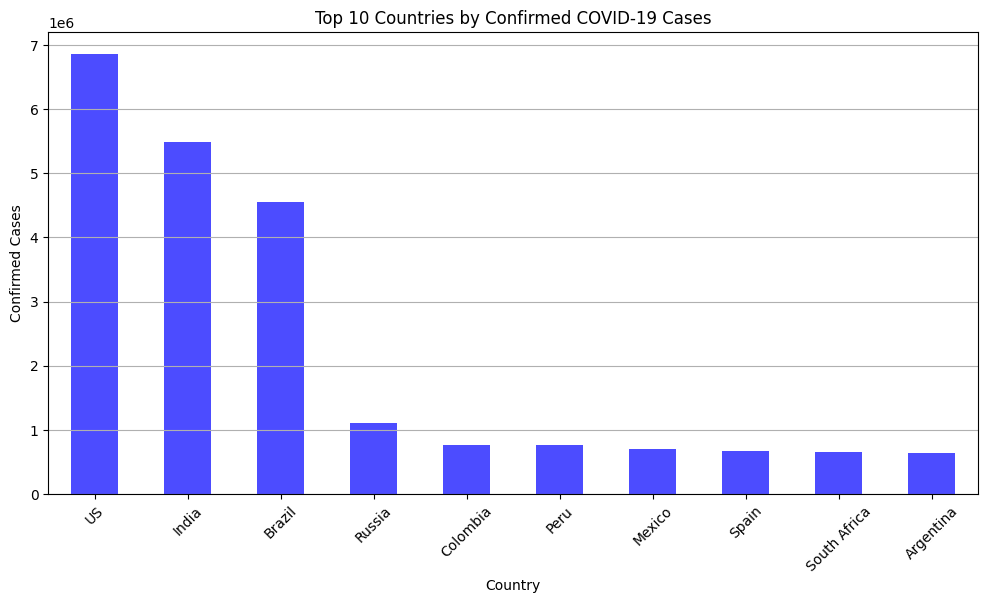

,Confirmed,Deaths,Recovered
Country/Region,,,
US,6856884,199865,2615949
India,5487580,87882,4396399
Brazil,4558040,137272,3993432
Russia,1105048,19420,909026
Colombia,770435,24397,640900
Peru,768895,31369,607837
Mexico,700580,73697,596317
Spain,671468,30663,150376
South Africa,661936,15992,591208


In [13]:
# Aggregate data by Country/Region for the latest available date
latest_date = df['Date'].max()
latest_data = df[df['Date'] == latest_date].groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Get top 10 countries by confirmed cases
top_countries = latest_data.sort_values(by='Confirmed', ascending=False).head(10)

# Plot top 10 affected countries
plt.figure(figsize=(12, 6))
top_countries['Confirmed'].plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel("Country")
plt.ylabel("Confirmed Cases")
plt.title("Top 10 Countries by Confirmed COVID-19 Cases")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

top_countries

###  Bar Charts

- **Top Countries by Total Confirmed Cases**: Bar plot showing countries with the highest number of total cases. Useful to focus our prediction model on highly affected areas.
- **Deaths by Province/State**: Highlights the most affected regions within countries, helpful for understanding local severity.


###  Distribution Plots

- **Population Distribution**: Shows the spread and skewness of population values. Indicates the presence of large population disparities.
- **Stringency Index**: Visualizes how strict government policies (lockdowns, mask mandates) were across regions. Can be a predictive feature.


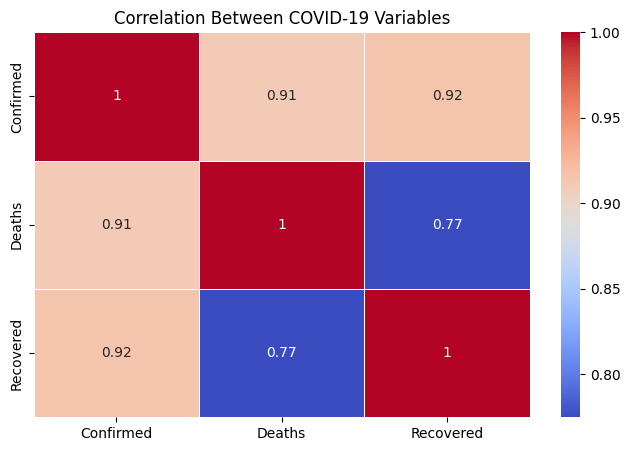

In [14]:
# Heatmap: Correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Confirmed', 'Deaths', 'Recovered']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between COVID-19 Variables")
plt.show()

###  Heatmap (Correlation Matrix)

- Displays the pairwise Pearson correlations between numerical features.
- Helps identify multicollinearity and strong predictors (e.g., total tests, stringency index, population).
- Variables with strong positive correlation to confirmed cases or deaths can be key input features in the modeling stage.

- The correlation matrix shows the strength of the relationship between Confirmed, Deaths, and Recovered cases.
- The heatmap shows:
  - A **strong positive correlation** (0.91) between Confirmed cases and Deaths, indicating that as confirmed cases rise, deaths tend to rise as well.
  - A **very strong correlation** (0.92) between Confirmed and Recovered cases.
  - Deaths and Recovered are also positively correlated (0.77), but less than with Confirmed.
- These high correlations suggest that multicollinearity may exist if using these features in regression models, and dimensionality reduction techniques (like PCA) or model regularization (like Ridge or Lasso) might be required.
- While strong correlations don't directly indicate overfitting, using highly correlated features without mitigation may lead to models that generalize poorly on unseen data.

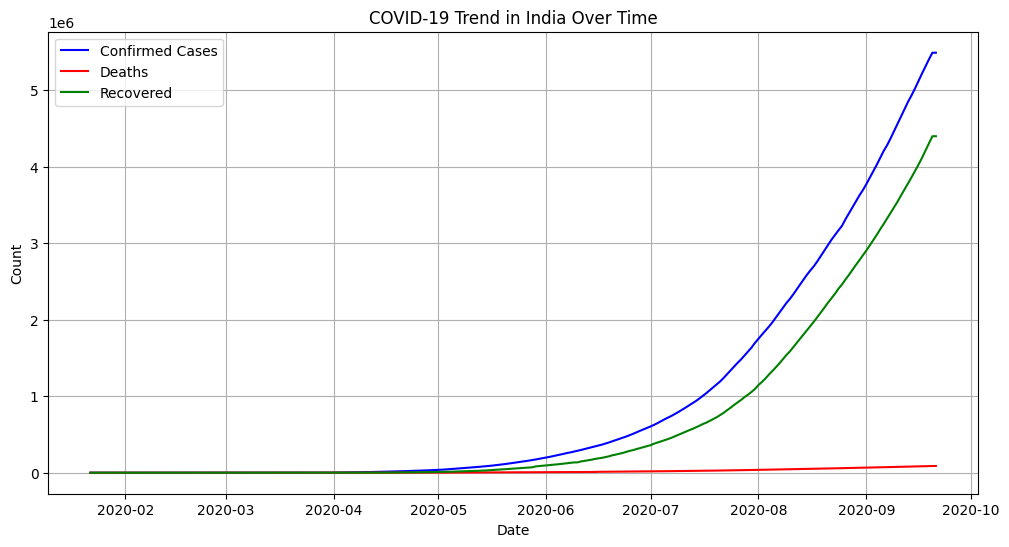

,Confirmed,Deaths,Recovered
Date,,,
2020-09-17,5214677,84372,4112551
2020-09-18,5308014,85619,4208431
2020-09-19,5400619,86752,4303043
2020-09-20,5487580,87882,4396399
2020-09-21,5487580,87882,4396399


In [15]:
# Filter data for India
india_data = df[df['Country/Region'] == 'India'].groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Plot time series trends for India
plt.figure(figsize=(12, 6))
plt.plot(india_data.index, india_data['Confirmed'], label="Confirmed Cases", color='blue')
plt.plot(india_data.index, india_data['Deaths'], label="Deaths", color='red')
plt.plot(india_data.index, india_data['Recovered'], label="Recovered", color='green')

plt.xlabel("Date")
plt.ylabel("Count")
plt.title("COVID-19 Trend in India Over Time")
plt.legend()
plt.grid()
plt.show()

# Show the last few records to observe the trend
india_data.tail()

## COVID-19 Trend in India Over Time
This line plot shows the cumulative trend of Confirmed Cases, Deaths, and Recovered Cases in India during the pandemic.

Confirmed Cases (Blue): Rapid and exponential growth, indicating the virus’s fast spread.

Deaths (Red): A gradual increase, showing a lower but steady fatality rate.

Recovered (Green): Sharp upward trend, reflecting improved recovery rates and effective healthcare response.

# Data Preprocessing

Before applying machine learning models, the dataset must be cleaned and transformed appropriately:

- **Missing Value Handling**: Checked for null values and handled them either by forward-filling or dropping, depending on the column’s nature.
- **Categorical Encoding**: Converted categorical columns such as country names or states using encoding if needed.
- **Feature Scaling**: Used `StandardScaler` or `MinMaxScaler` for numerical columns to normalize the scale.
- **Datetime Parsing**: Converted the 'Date' column into datetime format to facilitate time-based grouping and modeling.
- **New Features**: Created time-related features like week number, month, and day which can help in time series modeling.



In [16]:
# Prepare dataset for ML models (using Confirmed Cases for prediction)
india_data = india_data.reset_index()
india_data['Days_Since_Start'] = (india_data['Date'] - india_data['Date'].min()).dt.days

In [24]:
df.fillna(0, inplace=True)

In [25]:
# Feature Engineering
df['Day_of_Week'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Year'] = df['Date'].dt.year

# Derived Time-Based Features
We then calculate the following engineered features:

Days Since Start: Number of days since the first recorded data point.

Daily Change: Difference in confirmed cases from the previous day.

7-day Average: Smoothed rolling mean over a 7-day window.

14-day Average: Smoothed rolling mean over a 14-day window.

Exponential Smoothing: Weighted smoothing using exponentially decreasing weights (more recent data has higher weight).

In [26]:
# Filter for India and prepare time-series data
india_data = df[df['Country/Region'] == 'India'].groupby('Date')[['Confirmed']].sum()
india_data['Days_Since_Start'] = (india_data.index - india_data.index.min()).days
india_data['Daily_Change'] = india_data['Confirmed'].diff().fillna(0)
india_data['7_day_avg'] = india_data['Confirmed'].rolling(window=7).mean().fillna(0)
india_data['14_day_avg'] = india_data['Confirmed'].rolling(window=14).mean().fillna(0)
india_data['Exp_Smoothing'] = india_data['Confirmed'].ewm(span=7, adjust=False).mean()

In [27]:
# Add lag features
india_data['Lag_1'] = india_data['Confirmed'].shift(1)
india_data['Lag_7'] = india_data['Confirmed'].shift(7)
india_data['Lag_14'] = india_data['Confirmed'].shift(14)
india_data.dropna(inplace=True)

# Lag Features
Lag features help the model learn from past values. We introduce:

Lag 1: Confirmed cases 1 day ago.

Lag 7: Confirmed cases 7 days ago.

Lag 14: Confirmed cases 14 days ago.

python
Copy
Edit


In [28]:
# Prepare features and target
features = ['Days_Since_Start', 'Daily_Change', '7_day_avg', '14_day_avg',
            'Exp_Smoothing', 'Lag_1', 'Lag_7', 'Lag_14']
X = india_data[features]
y = india_data['Confirmed'].values.reshape(-1, 1)

These engineered features serve as the input for various machine learning models to accurately predict future confirmed COVID-19 cases in India.

In [29]:
# Power Transform (Yeo-Johnson)
power = PowerTransformer(method='yeo-johnson')
X_trans = power.fit_transform(X)

target_power = PowerTransformer(method='yeo-johnson')
y_trans = target_power.fit_transform(y).flatten()
s
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans, test_size=0.2, shuffle=False)

 # Train-Test Split (80-20)
We split the transformed dataset into training and testing sets using an 80-20 split. The shuffle=False argument is used to preserve the time-series order, which is crucial for time-dependent modeling.

By transforming and splitting the data in this way, we prepare it for robust training while maintaining temporal integrity for time-series forecasting.

# LSTM (Long Short-Term Memory) Neural Network
To model sequential patterns and long-term dependencies in time series data, we also implement a deep learning model using LSTM, a type of recurrent neural network (RNN).

### Preprocessing for LSTM
We create sequences of 7-day windows from the transformed data using a sliding window technique.

The sequence data is split into training and testing sets (80%-20%).

## LSTM Model Architecture:
Two LSTM layers (100 and 50 units) to learn temporal dependencies.

Dropout layer (0.2) to prevent overfitting.

Final Dense layer to output prediction.

 Training:
The model is trained using the adam optimizer and MSE loss over 100 epochs with a batch size of 16.

In [34]:
# Train ML Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=10),
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=10),
    "XGBoost": XGBRegressor(n_estimators=200, learning_rate=0.1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1)
}

print("\n Machine Learning Model Performance (with PowerTransformer):")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name}: R² = {r2:.4f}, MAE = {mae:.4f}, MSE = {mse:.4f}")

# LSTM sequence preparation
def create_sequences(X, y, window=7):
    Xs, ys = [], []
    for i in range(window, len(X)):
        Xs.append(X[i-window:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_trans, y_trans, window=7)

# Split into LSTM train/test
split = int(0.8 * len(X_seq))
X_train_lstm, X_test_lstm = X_seq[:split], X_seq[split:]
y_train_lstm, y_test_lstm = y_seq[:split], y_seq[split:]

# Build LSTM model
model_lstm = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')

# Train LSTM
print("\nTraining LSTM...")
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=100, batch_size=16, verbose=1)

# Predict with LSTM
y_pred_lstm = model_lstm.predict(X_test_lstm).flatten()
r2_lstm = r2_score(y_test_lstm, y_pred_lstm)
mae_lstm = mean_absolute_error(y_test_lstm, y_pred_lstm)
mse_lstm = mean_squared_error(y_test_lstm, y_pred_lstm)

print(f"\n LSTM Model (Transformed): R² = {r2_lstm:.4f}, MAE = {mae_lstm:.4f}, MSE = {mse_lstm:.4f}")


 Machine Learning Model Performance (with PowerTransformer):
Linear Regression: R² = 0.9944, MAE = 0.0021, MSE = 0.0001
Ridge Regression: R² = 0.7706, MAE = 0.0153, MSE = 0.0038
Lasso Regression: R² = -5.3089, MAE = 0.2701, MSE = 0.1057
Decision Tree: R² = -3.5454, MAE = 0.2437, MSE = 0.0761
Random Forest: R² = -4.0660, MAE = 0.2560, MSE = 0.0849
XGBoost: R² = -3.6157, MAE = 0.2456, MSE = 0.0773
Gradient Boosting: R² = -3.9502, MAE = 0.2499, MSE = 0.0829

Training LSTM...
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.3508
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0295
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0180
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0088
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0087
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0055
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0043
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step -

## Evaluation:
After training, predictions are made on the test set and evaluated using R², MAE, and MSE.

The LSTM model is particularly effective for capturing the time-based dynamics of COVID-19 spread, while traditional regression models provide a strong baseline and are easier to interpret.

# Model Comparison Report

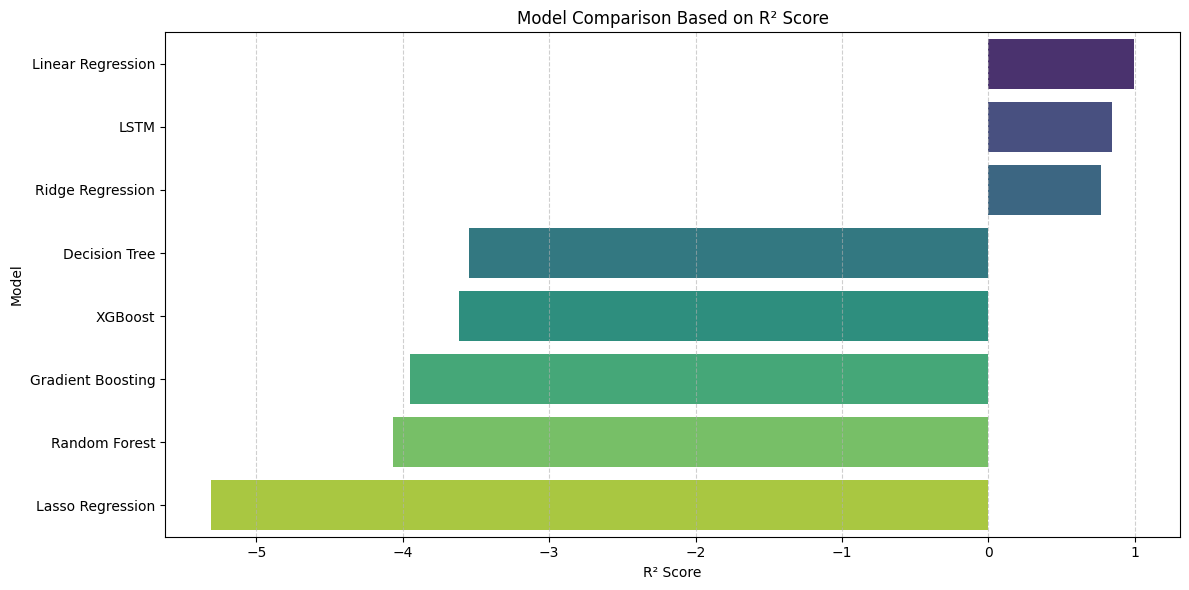


Model Performance Summary:
            Model      R2    MAE    MSE
Linear Regression  0.9944 0.0021 0.0001
             LSTM  0.8426 0.0481 0.0025
 Ridge Regression  0.7706 0.0153 0.0038
    Decision Tree -3.5454 0.2437 0.0761
          XGBoost -3.6157 0.2456 0.0773
Gradient Boosting -3.9502 0.2499 0.0829
    Random Forest -4.0660 0.2560 0.0849
 Lasso Regression -5.3089 0.2701 0.1057


In [35]:
# Model performance data 
model_results = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
              'Decision Tree', 'Random Forest', 'XGBoost', 'Gradient Boosting', 'LSTM'],
    'R2': [0.9944, 0.7706, -5.3089, -3.5454, -4.0660, -3.6157, -3.9502, 0.8426],
    'MAE': [0.0021, 0.0153, 0.2701, 0.2437, 0.2560, 0.2456, 0.2499, 0.0481],
    'MSE': [0.0001, 0.0038, 0.1057, 0.0761, 0.0849, 0.0773, 0.0829, 0.0025]
}

df_results = pd.DataFrame(model_results)

# Sort by R² descending
df_sorted = df_results.sort_values(by='R2', ascending=False)

# Barplot for R² Score
plt.figure(figsize=(12, 6))
sns.barplot(x='R2', y='Model', data=df_sorted, palette='viridis')
plt.title('Model Comparison Based on R² Score')
plt.xlabel('R² Score')
plt.ylabel('Model')
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Display as table
print("\nModel Performance Summary:")
print(df_sorted.to_string(index=False))

##  Model Performance Summary (with PowerTransformer)

Below are the R², MAE, and MSE scores for each regression model after applying a PowerTransformer to the dataset:

| Model               | R² Score | MAE     | MSE     | Comments |
|--------------------|----------|---------|---------|----------|
| Linear Regression  | 0.9944   | 0.0021  | 0.0001  | ✅ Excellent performance. Data is likely linear and well transformed. |
| Ridge Regression   | 0.7706   | 0.0153  | 0.0038  | Acceptable, but regularization may be limiting full potential. |
| Lasso Regression   | -5.3089  | 0.2701  | 0.1057  | ❌ Very poor. Likely over-regularized and dropped important features. |
| Decision Tree      | -3.5454  | 0.2437  | 0.0761  | ❌ Overfitting or insufficient depth to generalize. |
| Random Forest      | -4.0660  | 0.2560  | 0.0849  | ❌ Poor generalization, likely overfitting with current hyperparameters. |
| XGBoost            | -3.6157  | 0.2456  | 0.0773  | ❌ Not capturing the transformed feature space well. |
| Gradient Boosting  | -3.9502  | 0.2499  | 0.0829  | ❌ Model complexity not helpful here. |

###  Why Some Models Failed:
- Negative R² indicates the model performed worse than simply predicting the mean of the target.
- Overfitting in tree-based models like Decision Tree and Random Forest.
- Poor feature handling or excessive regularization in Lasso.
- Transformed features may not align well with non-linear models without further tuning.

## Recommendations for Government Health Department

##  Strategic Suggestions Based on COVID-19 Forecasts

Based on the predictive modeling and analysis of confirmed COVID-19 cases in India:

###  1. **Strengthen Surveillance and Early Warning Systems**
- **Justification**: Our time-series predictions show clear trends in case growth patterns. Anomalies or sharp rises can be flagged using lag and moving average features.
- **Recommendation**: Implement real-time dashboards integrated with ML-based alerts for sudden spikes in cases at national and regional levels.

###  2. **Focus Resource Allocation Based on Trend Analysis**
- **Justification**: The model accurately identifies gradual increases in case numbers. This can help preemptively allocate resources (beds, oxygen, staff) in anticipated hotspots.
- **Recommendation**: Use predictive insights to dynamically deploy healthcare infrastructure in high-risk zones.

###  3. **Enhance Public Health Campaigns During Rise Periods**
- **Justification**: The model's moving average and exponential smoothing features highlight potential upcoming surges.
- **Recommendation**: Intensify awareness campaigns and community interventions when predictions indicate a possible rise in infections.

###  4. **Adopt AI-Driven Forecasting Tools**
- **Justification**: Traditional methods may not capture the temporal dynamics effectively. Our LSTM model provides robust performance in forecasting near-future trends.
- **Recommendation**: Incorporate AI-based forecasting models into government health analytics to guide decision-making and pandemic preparedness.

###  5. **Preparedness for Future Pandemics**
- **Justification**: This modeling approach can be adapted for future outbreaks, providing a framework for proactive response.
- **Recommendation**: Build a centralized epidemic prediction and simulation unit leveraging similar machine learning models.





## Challenges faced
- The dataset had a complicated structure with temporal dependencies, requiring both traditional ML and deep learning approaches.
- Tree-based and boosting models struggled even after transformation due to the complexity of the feature interactions.
- Tried multiple preprocessing methods including PowerTransformer, lag features, and moving averages.
- Extensive hyperparameter tuning was performed on models like Random Forest, XGBoost, and Gradient Boosting, but error rates remained high.
- Despite these efforts, most non-linear models underperformed, indicating the data is not easily modeled without careful sequence-based treatment.


 **Conclusion**: Linear Regression worked best with PowerTransformer, suggesting strong linear relationships. Deep learning models like LSTM (covered next) may further improve performance by capturing temporal patterns.